In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\survey\survey_original.csv')

# Let see the shape and types of features and any null values


In [48]:
df.shape


(141, 39)

# Check the Missing values

In [37]:
df.isnull().sum()


Timestamp                                  0
Industry                                   0
Employees_size                             0
IT_size                                    0
Team_size                                  0
LifeCycle_Software                         0
Software_System                            0
Software_system_architecture               0
Deployable_Components                      0
Runtime_component_instances                0
Component_Communication_Styles             0
Deployed_on                                0
Computing_Model_Layers                     0
Release_automation_rate                    0
upgrades_release rate                      0
System_load_ user_requests                 0
observability_rate                         0
Problem_discover                           0
Incident_first_check_metrics               0
Most_common_incident                       0
Incidents_require_manual_ intervention     0
managed_incidents                         42
Incidents_

# Check the types of the columns whether numerical or  categorical

In [38]:
df.dtypes

Timestamp                                 object
Industry                                  object
Employees_size                            object
IT_size                                   object
Team_size                                 object
LifeCycle_Software                        object
Software_System                           object
Software_system_architecture              object
Deployable_Components                     object
Runtime_component_instances               object
Component_Communication_Styles            object
Deployed_on                               object
Computing_Model_Layers                    object
Release_automation_rate                    int64
upgrades_release rate                     object
System_load_ user_requests                object
observability_rate                         int64
Problem_discover                          object
Incident_first_check_metrics              object
Most_common_incident                      object
Incidents_require_ma

In [ ]:
# All the columns are categorical and see the composition of Data  in each categorical column
#column Timestamp can be removed

In [67]:
col_to_drop=['Third_party_tools ','Timestamp','Alert_percentage','Improve_plan','survey_useful','Reliability_availability','Incidents_require_manual_ intervention', 'managed_incidents','Deployment_techniques'] 
df.drop(columns=col_to_drop,axis =1, inplace=True)


# Data  Analysis

In [40]:
df.columns

Index(['Industry', 'Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles'],
      dtype='object')

In [41]:
cdf=pd.DataFrame()
colum_name =[]
unique_value=[]
for column in df.columns :
    if df[column].dtypes==object :
        colum_name.append(str(column)) 
        unique_value.append(df[column].nunique())
     
cdf['Column'] = colum_name
cdf['Value']= unique_value
cdf=cdf.sort_values('Value',ascending=False)
cdf

,Column,Value
15,Incident_first_check_metrics,92
14,Problem_discover,62
4,LifeCycle_Software,51
27,adoption_main_obstacles,50
11,Computing_Model_Layers,34
0,Industry,29
6,Software_system_architecture,27
5,Software_System,24
16,Most_common_incident,16
9,Component_Communication_Styles,14


# Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [68]:
categorical_features=[column for column in df.columns if df[column].dtypes=='O']
#categorical_features

In [69]:
# As there are many categories inside industry column . we will handle Rare elements in each categorical column
for col in categorical_features:
    temp=df.groupby(col)['Industry'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[col]=np.where(df[col].isin(temp_df),df[col],'Other')

In [70]:
cdf=pd.DataFrame()
colum_name =[]
unique_value=[]
for column in df.columns :
    if df[column].dtypes==object :
        colum_name.append(str(column)) 
        unique_value.append(df[column].nunique())
     
cdf['Column'] = colum_name
cdf['Value']= unique_value
cdf=cdf.sort_values('Value',ascending=False)
cdf

,Column,Value
14,Problem_discover,29
15,Incident_first_check_metrics,27
27,adoption_main_obstacles,27
4,LifeCycle_Software,25
11,Computing_Model_Layers,18
6,Software_system_architecture,15
5,Software_System,14
9,Component_Communication_Styles,13
0,Industry,12
16,Most_common_incident,10


# Visual Analysis

# check the composition of data  in each categorical column which are < 8 categories

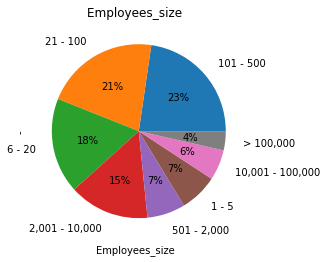

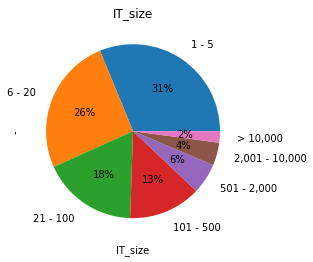

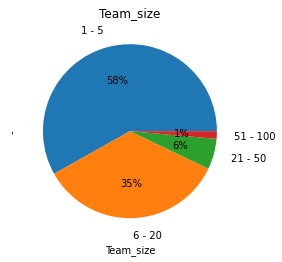

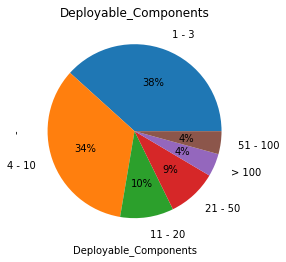

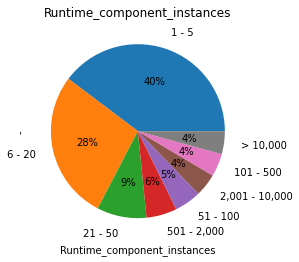

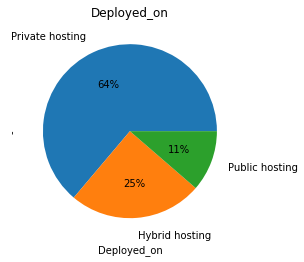

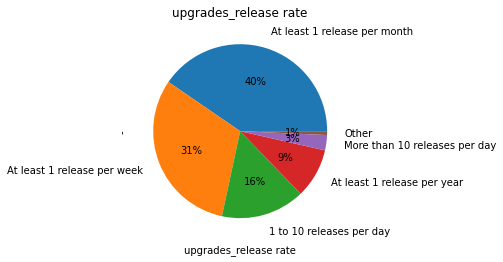

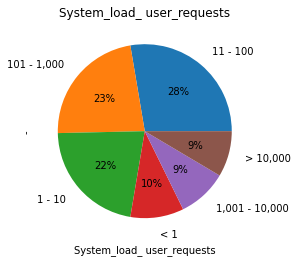

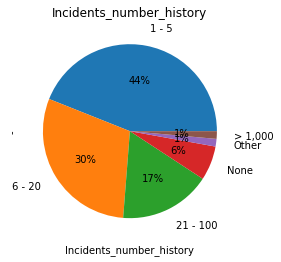

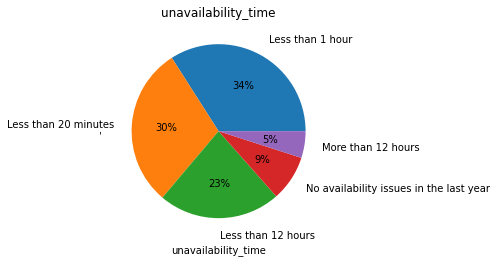

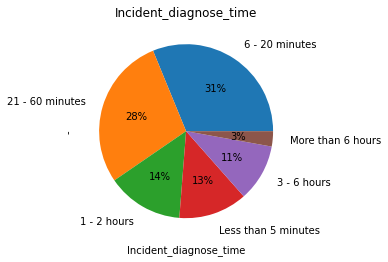

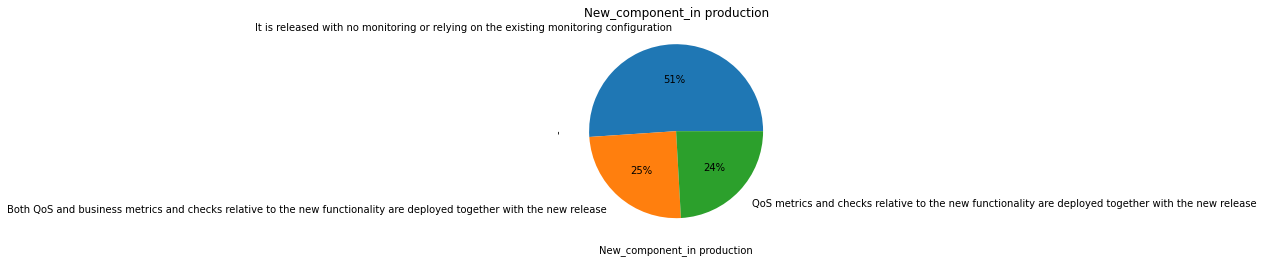

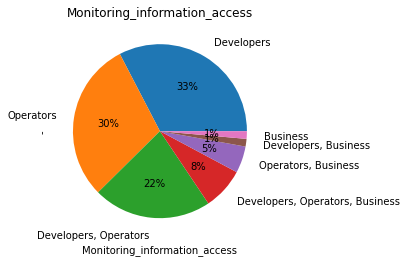

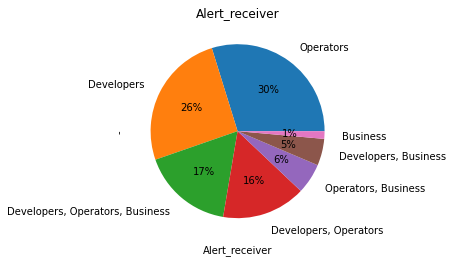

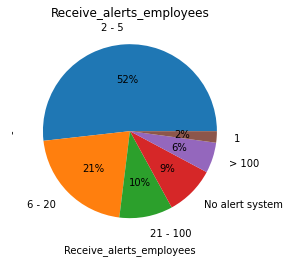

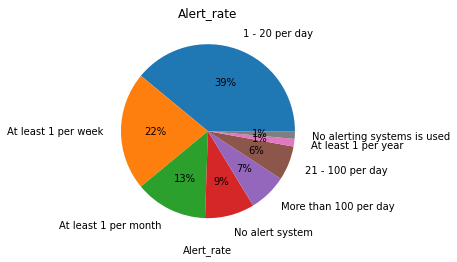

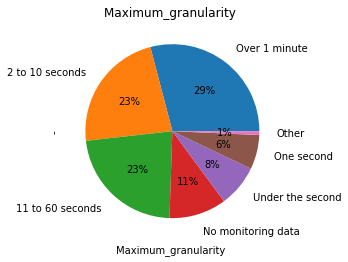

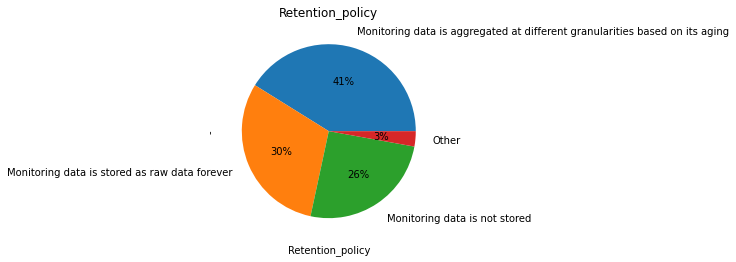

In [57]:
for column in categorical_features:
    
    if len(list(df[column].unique())) <= 8:
        labels=df[column].value_counts().index
        df[column].value_counts().head(8).plot.pie(labels=labels,autopct='%1.0f%%',labeldistance=1.2)
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

# check the composition of data  in each categorical column which are >=12 categories

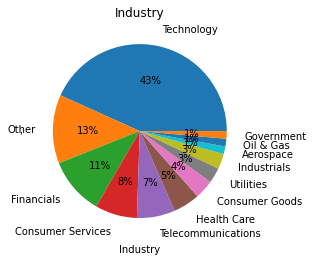

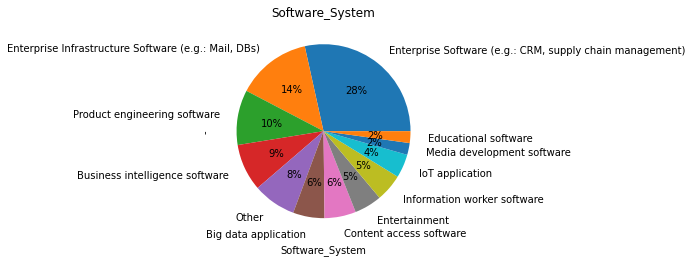

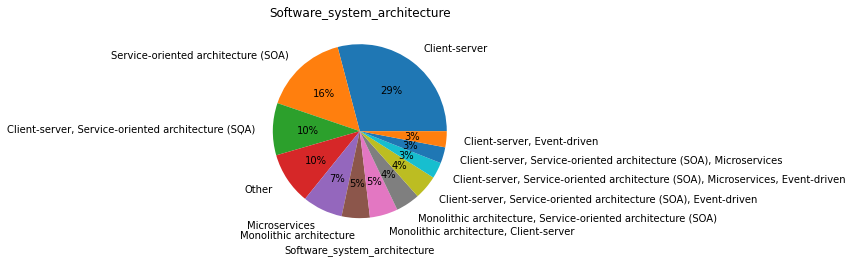

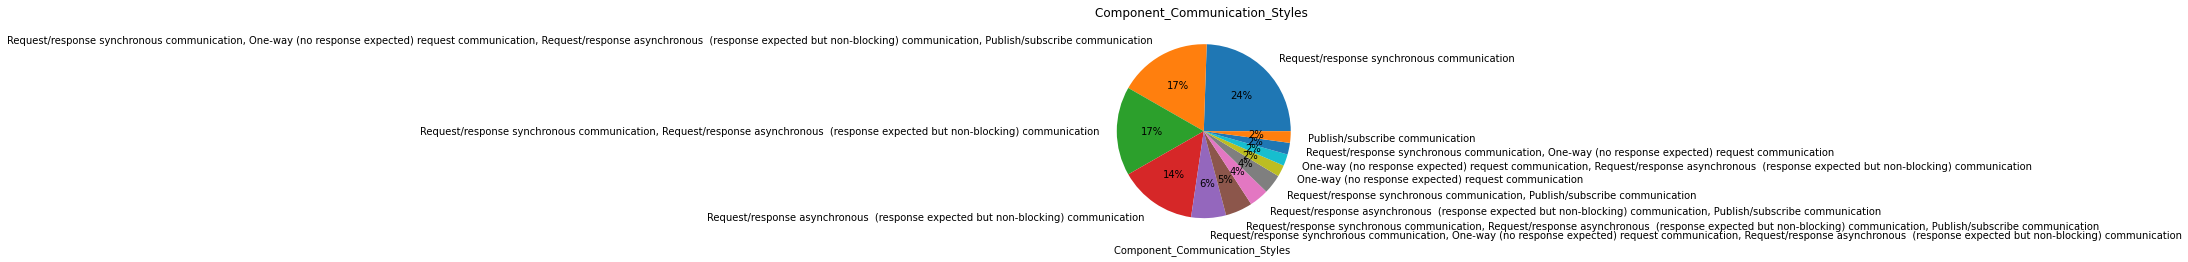

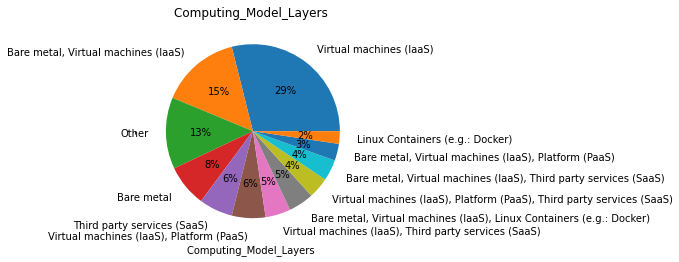

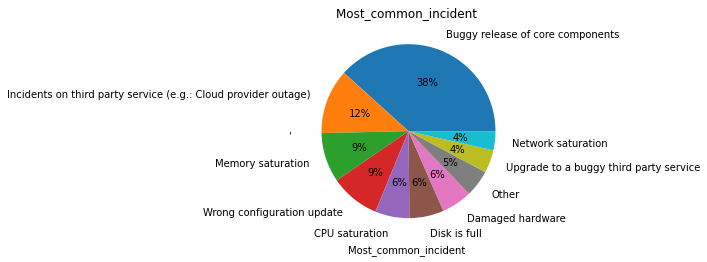

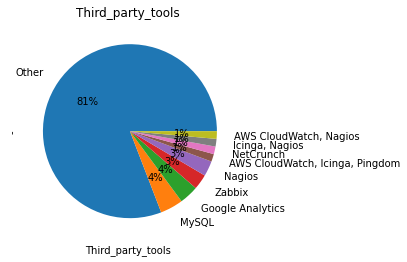

In [58]:
for column in categorical_features:
    
    if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
        df[column].value_counts().head(12).plot.pie(autopct='%1.0f%%',labeldistance=1.2)
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

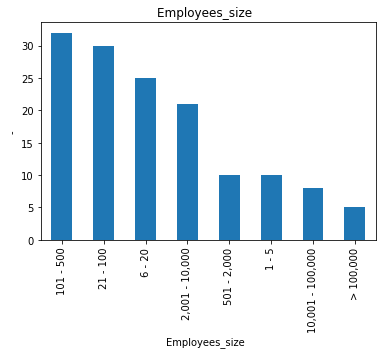

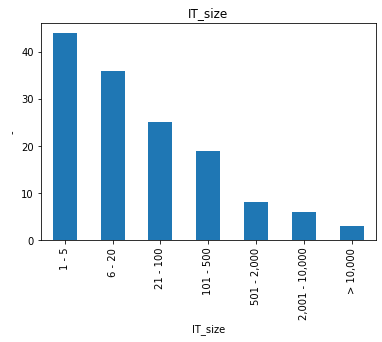

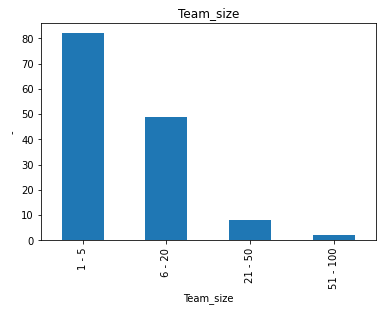

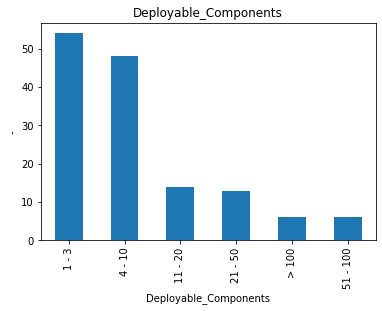

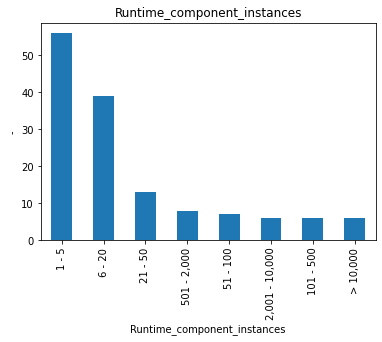

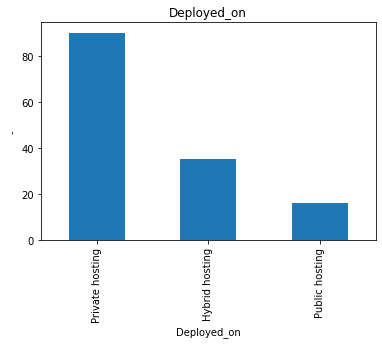

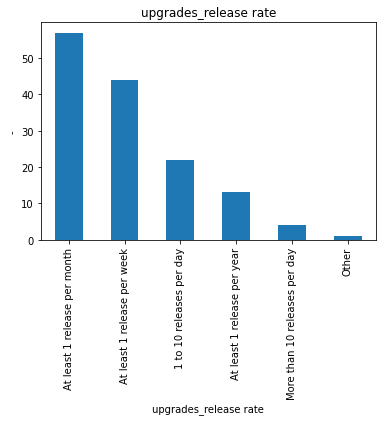

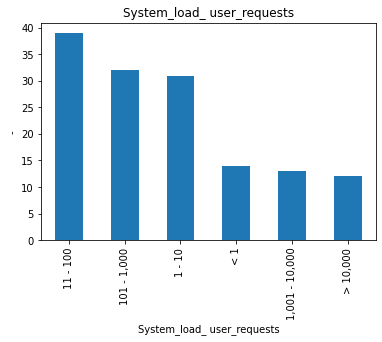

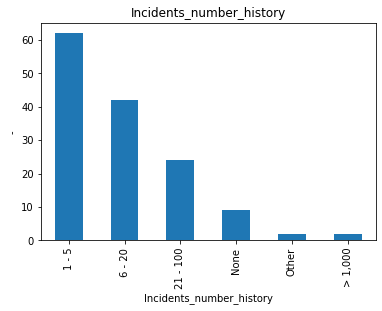

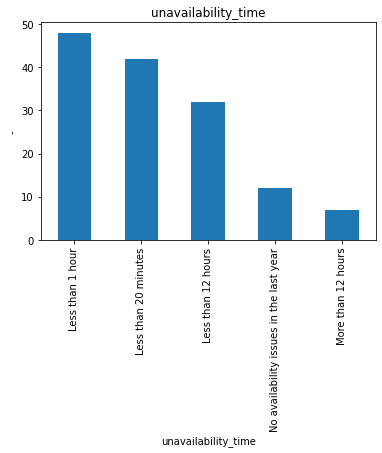

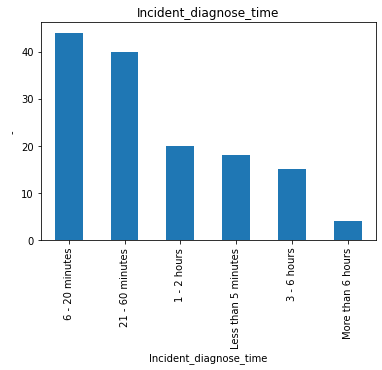

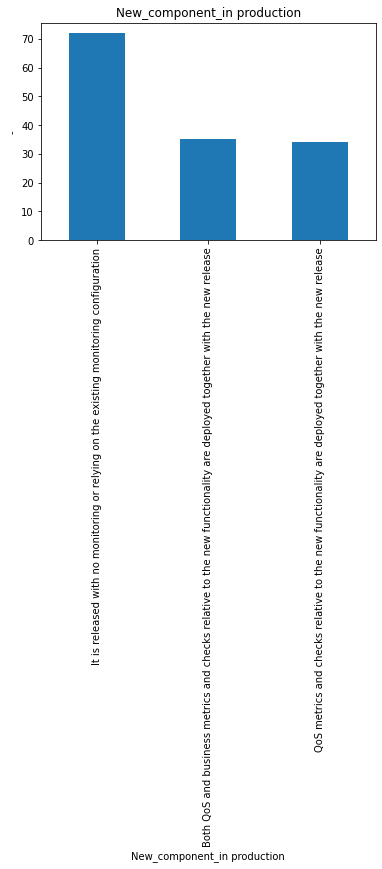

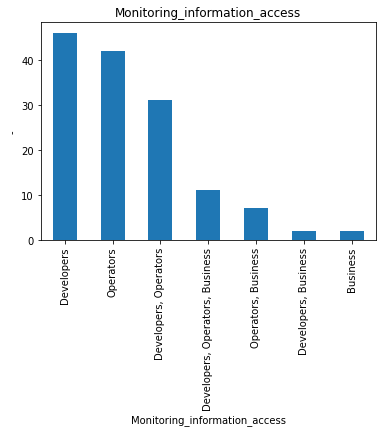

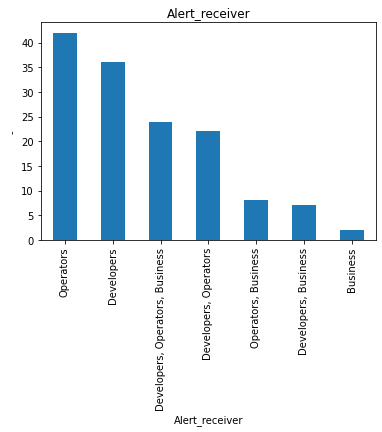

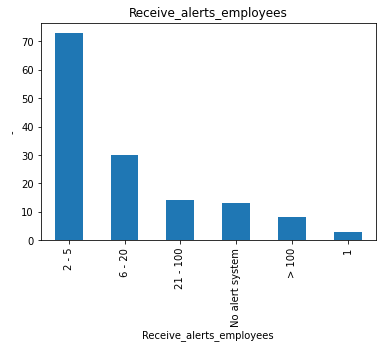

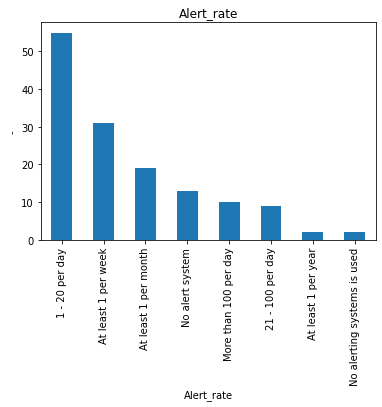

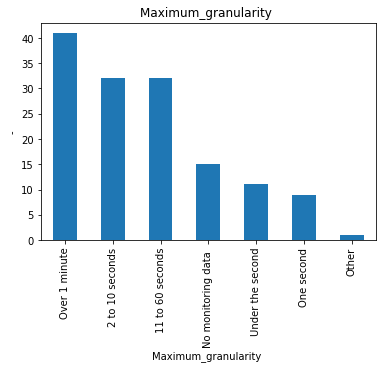

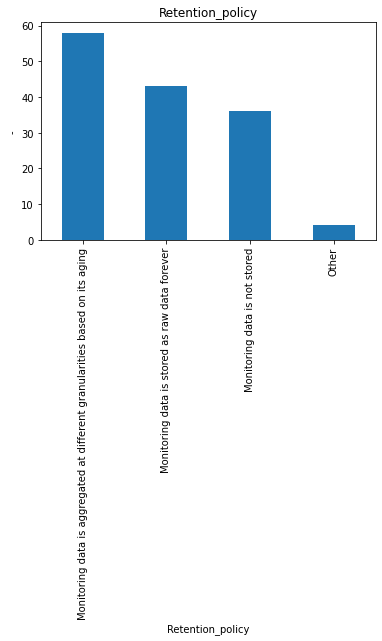

In [59]:
for column in categorical_features:
    
    if len(list(df[column].unique())) <= 8:
        df[column].value_counts().head(8).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

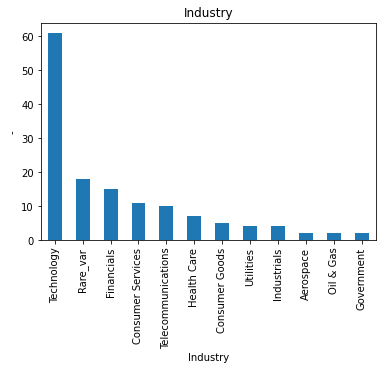

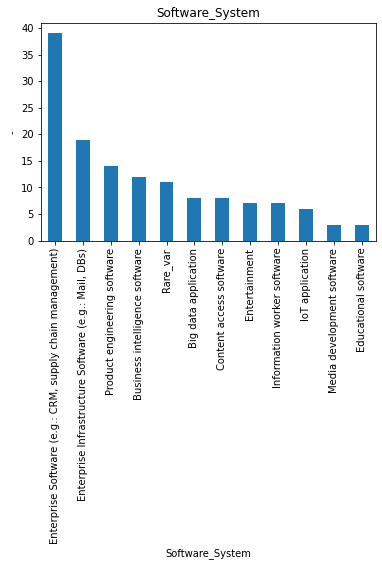

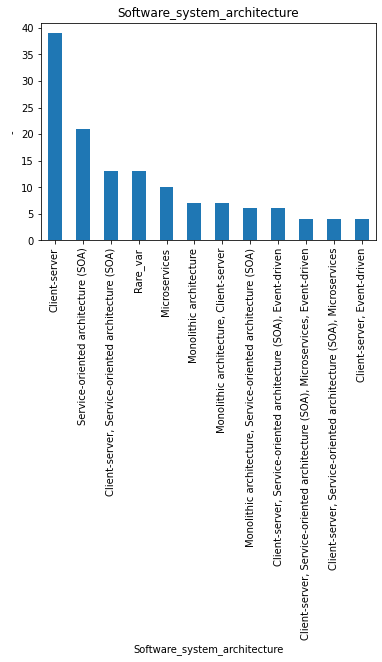

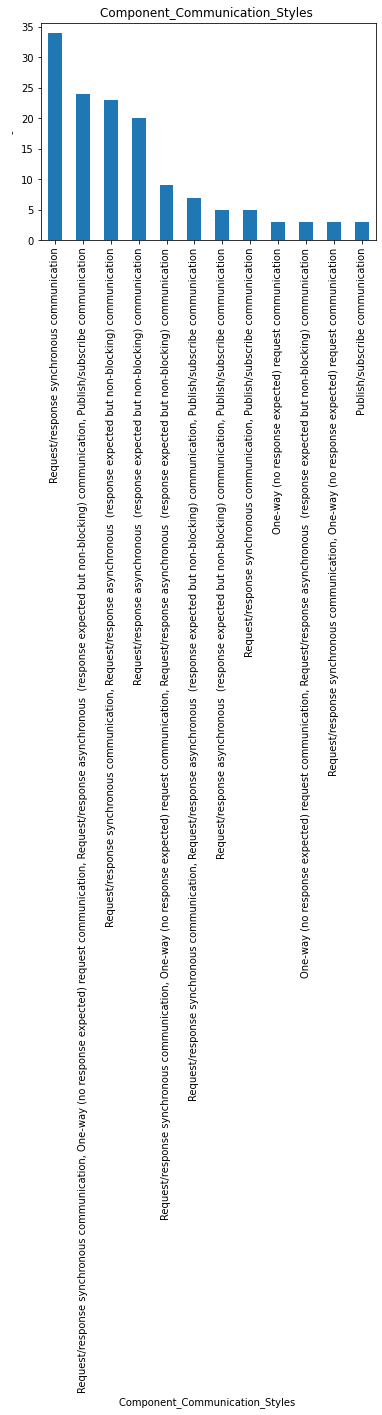

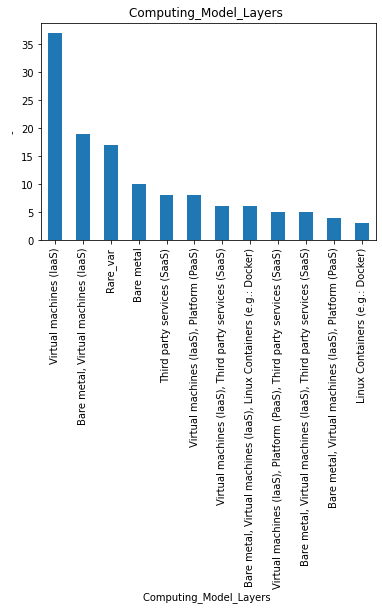

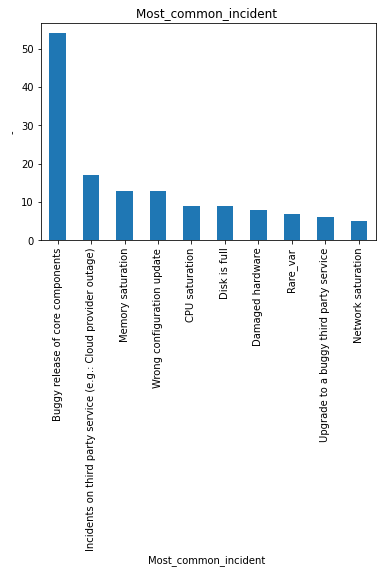

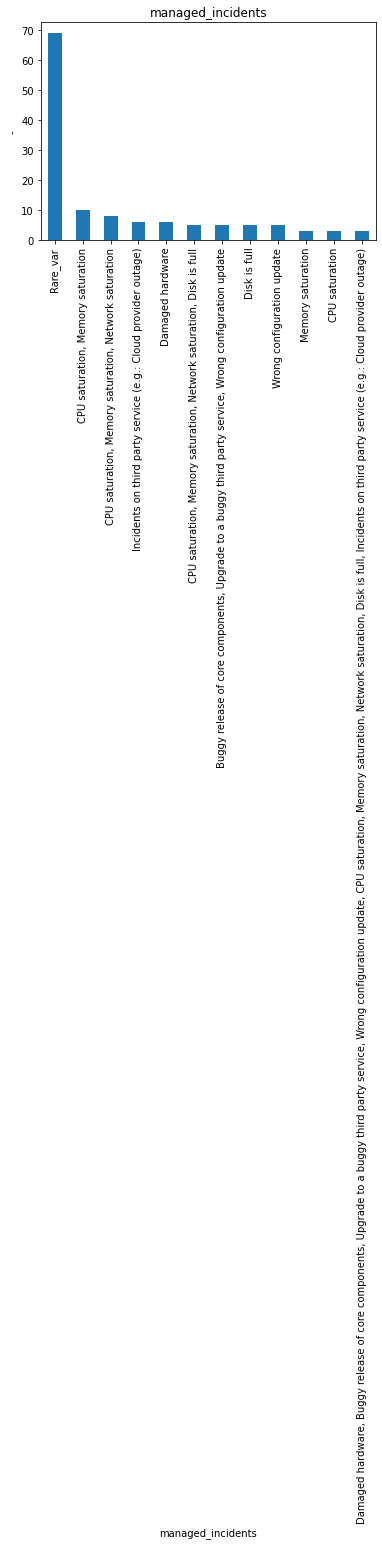

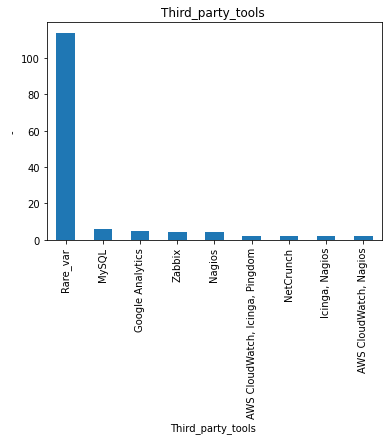

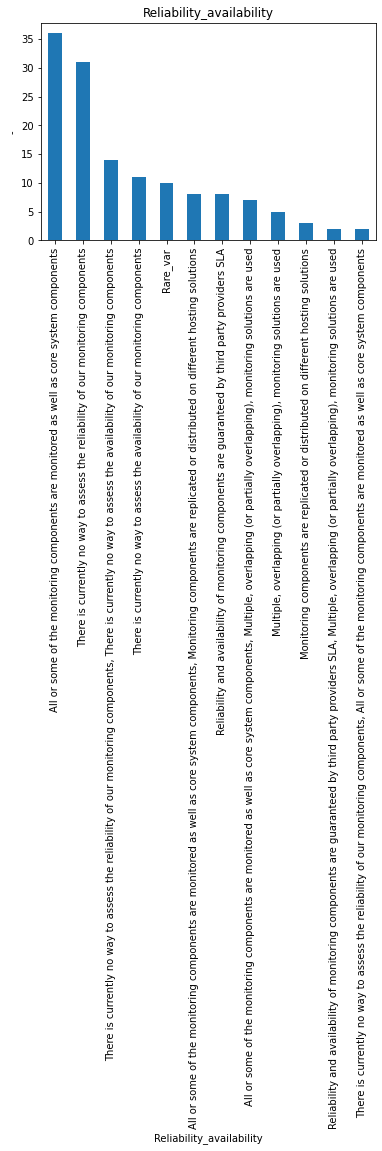

In [108]:
for column in categorical_features:
    
    if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
        df[column].value_counts().head(12).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

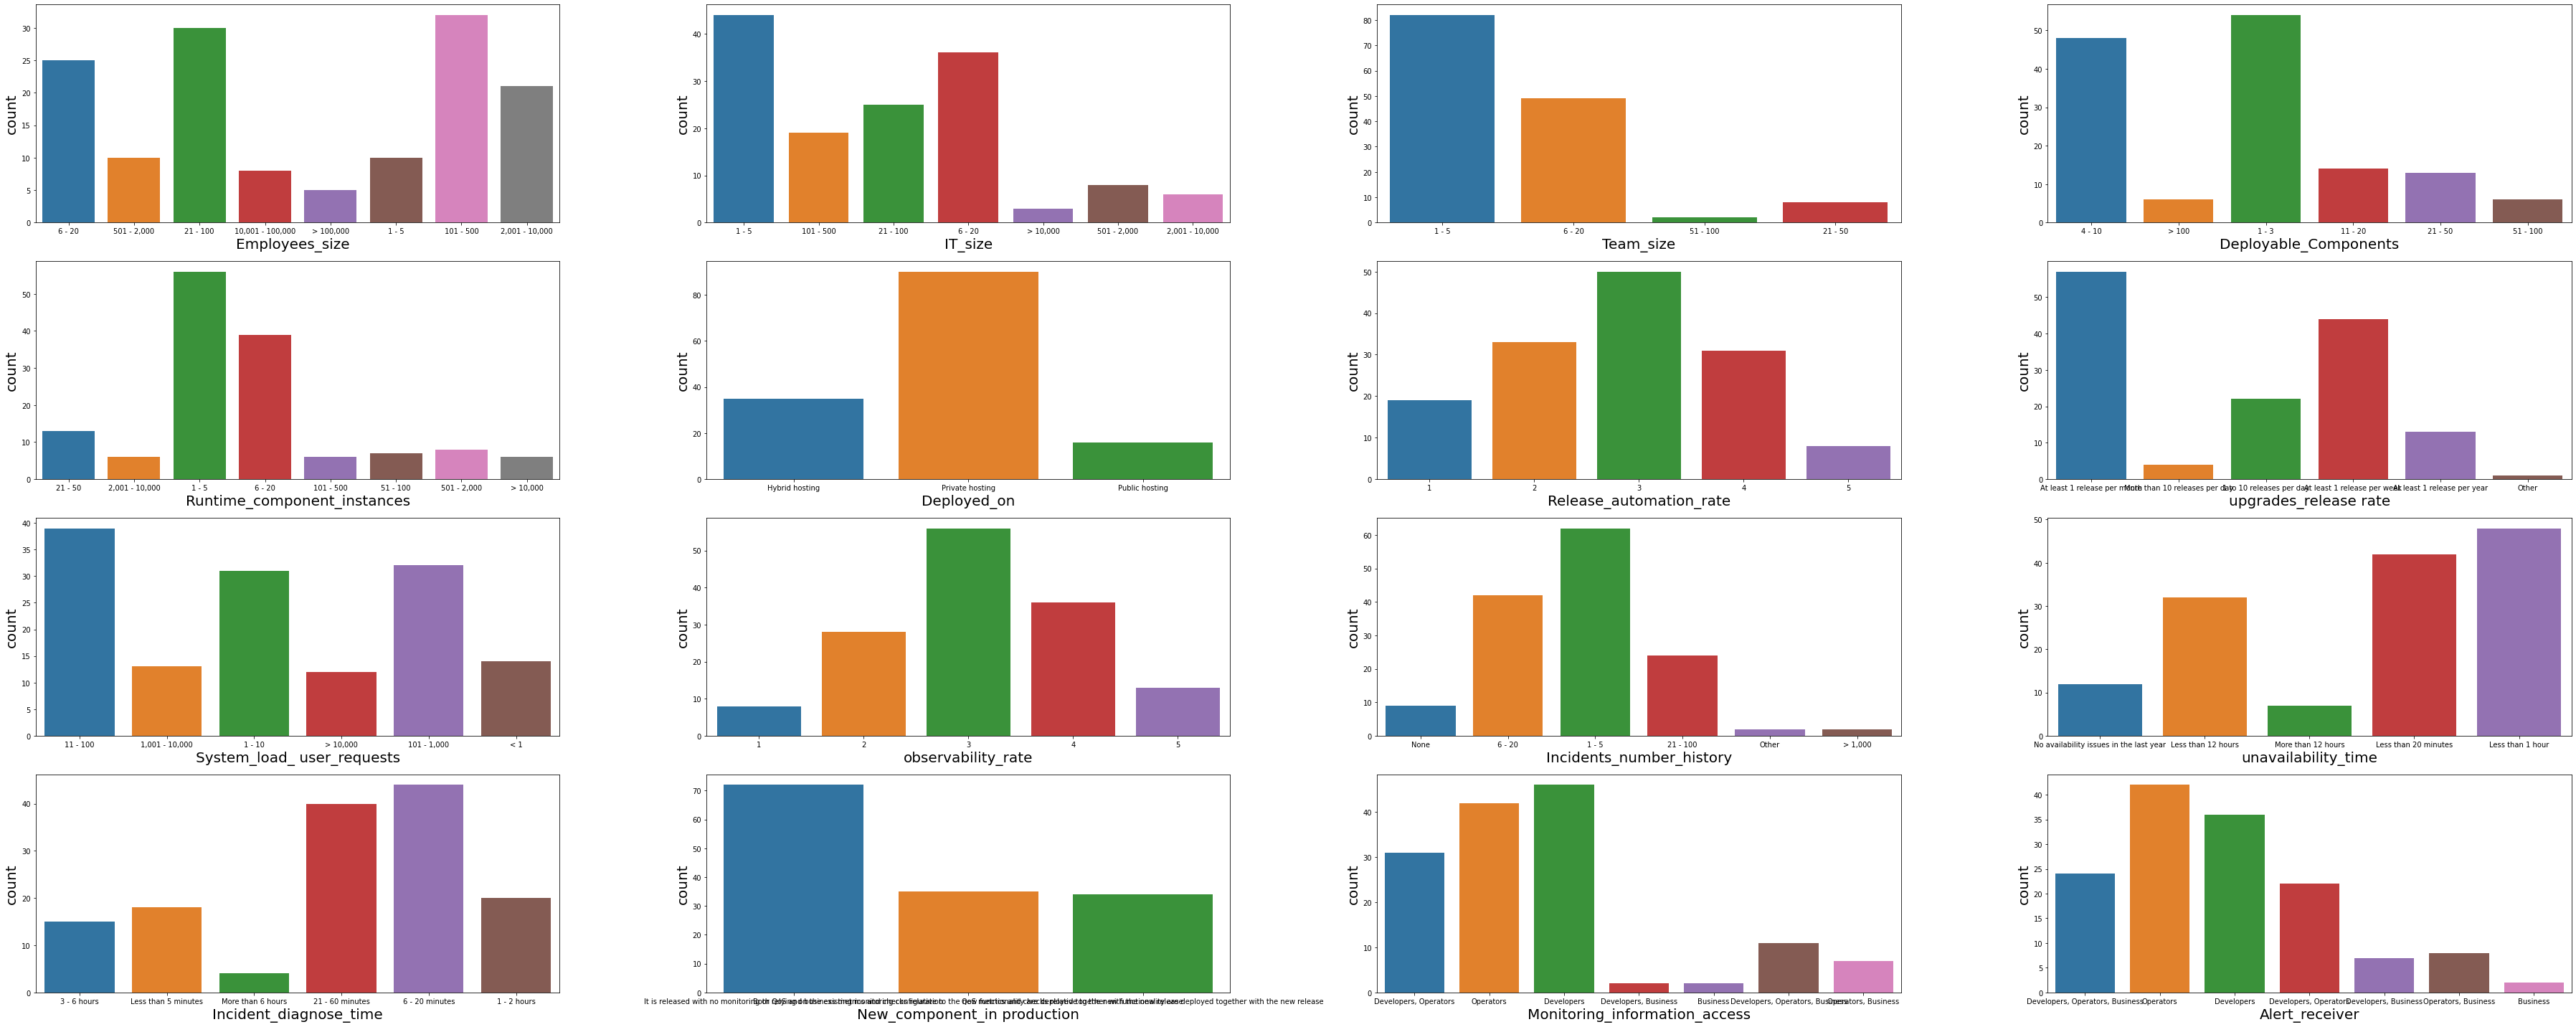

In [67]:
#Let us treat the data as the description of data is too lengthy and missing values imputation is wrong
#'Component_Communication_Styles ','Third_party_tools '''Incident_first_check_metrics'
#categorical values  for f1,f2,f3,f4 ( x values)
plotnumber=1
plt.figure(figsize=(50,20))
for column in df:
    if len(list(df[column].unique())) <= 8:
        df[column].sort_values(ascending=True)
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.countplot(column,data=df)
            plt.xlabel(column,fontsize=20)
            plt.ylabel('count',fontsize=20)
    
        
        plotnumber+=1
plt.tight_layout()

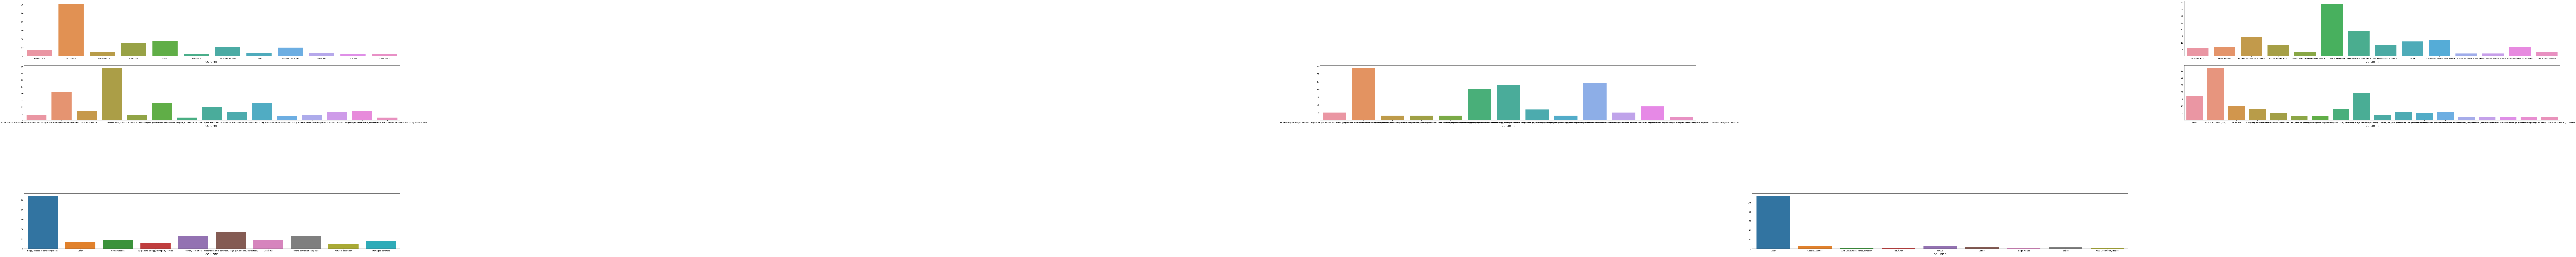

In [68]:
plotnumber=1
plt.figure(figsize=(200,20))
for column in df:
    
        df[column].sort_values(ascending=True)
        if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
            ax = plt.subplot(4,6,plotnumber)
            sns.countplot(column,data=df)
            plt.xlabel('column',fontsize=20)
            plt.ylabel('-',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [33]:

df.columns

Index(['Industry', 'Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles'],
      dtype='object')

In [71]:
#Label Encoding 
 
    
categorical_col=['Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])  

In [72]:
# Let us check the columns for one hot encoding and label encoding
#One Hot Encoding

#['Industry','LifeCycle_Software','Software_System', 'Software_system_architecture',''upgrades_release rate'

dummies = pd.get_dummies(df[['Industry']], drop_first=True)
df=pd.concat([df.drop(['Industry',],axis=1), dummies],axis=1)
 
 

In [52]:
df.columns

Index(['Employees_size  ', 'IT_size', 'Team_size', 'LifeCycle_Software',
       'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles',
       'Industry_Consumer Goods', 'Industry_Consumer Services',
       'Industry_Financials', 'Industry_Government', 'Industry_Health Care',
       'Industry_Industrials', 'Industry_Oil & Gas', 'Industry_Ot

In [49]:
df.head(10)

,Employees_size,IT_size,Team_size,LifeCycle_Software,Software_System,Software_system_architecture,Deployable_Components,Runtime_component_instances,Component_Communication_Styles,Deployed_on,...,Industry_Consumer Services,Industry_Financials,Industry_Government,Industry_Health Care,Industry_Industrials,Industry_Oil & Gas,Industry_Other,Industry_Technology,Industry_Telecommunications,Industry_Utilities
0,7,0,0,18,10,5,1,3,5,0,...,0,0,0,1,0,0,0,0,0,0
1,5,1,3,23,7,13,4,2,6,1,...,0,0,0,0,0,0,0,1,0,0
2,4,3,3,23,13,7,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,3,0,5,13,0,1,7,1,1,...,0,0,0,0,0,0,0,1,0,0
4,7,6,0,4,0,0,1,7,7,1,...,0,0,0,0,0,0,0,1,0,0
5,1,3,0,10,11,13,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,4,6,0,0,0,6,1,...,0,0,0,0,0,0,0,1,0,0
7,7,0,0,23,6,0,0,0,4,1,...,0,0,0,0,0,0,0,1,0,0
8,6,6,2,24,5,0,5,5,11,1,...,0,1,0,0,0,0,0,0,0,0
9,4,6,0,5,2,4,1,7,12,1,...,0,0,0,0,0,0,0,1,0,0


# Feature Scaling

In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [56]:
X=df

# Clustering Algorithm kmeans


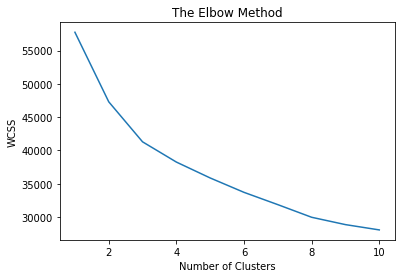

In [73]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11) :
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

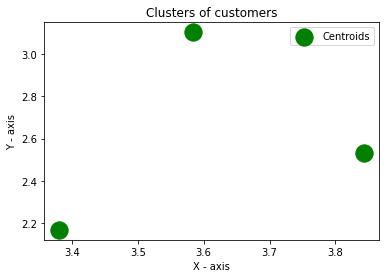

In [74]:
#fitting  K Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#Visualize the clusters
#plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
#plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
#plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, y)

dfscores=pd.DataFrame(chi_selector.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank
features_rank.nlargest(10,'Score')

NameError: name 'y' is not defined

In [14]:
#2nd Method
#--------
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)
ExtraTreesClassifier()
print(model.feature_importances_)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

C:\Users\kmmoh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\kmmoh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

NameError: name 'y' is not defined

In [ ]:
#

In [ ]:
df['Employees_size  '].value_counts().plot.pie()
df['IT_size'].value_counts().index
df['Team_size'].value_counts().index
df['LifeCycle_Software'].value_counts().index  
df['Software_System'].value_counts().index
df['Software_system_architecture'].value_counts().index                                                                            6

In [ ]:

 df['Third_party_tools '].str.contains('Zabbix,MySQL,Google Analytics, Nagios').value_counts().plot.pie()
df['Third_party_tools '].fillna('None')
if df['Third_party_tools '].str.contains('Apache Kafka', 'Google Analytics', 'Google Cloud Monitoring')  is True :
        df['Third_party_tools ']
Apache Kafka, Elasticsearch, Kibana, LogStash, MySQL, RabbitMQ
Grafana, Graphite, Kibana, LogStash, Zenoss
Google Analytics
AWS CloudWatch
AWS CloudWatch, Icinga, Pingdom
Azure Application Insight, Google Analytics, Google Cloud Monitoring
NetCrunch
Grafana, NetCrunch
MySQL
Google Analytics, LogStash, NewRelic
Elasticsearch, Google Analytics, Oracle
Jetpack
Google Analytics, Grafana, Nagios, Zabbix
MySQL
Zabbix
Elasticsearch, LogStash, Prometheus
Grafana, InfluxDB, Sensu
Azure Application Insight, HockeyApp
MySQL
Splunk, PRTG Paessler
AppDynamics, Google Analytics, IBM Tivoli
AppDynamics, AWS CloudWatch, Nagios
Icinga, Nagios
Google Analytics
Google Analytics
Ca wily introscope
Cacti, Google Analytics
MySQL
Google Analytics, MySQL, Splunk
Google Analytics, IBM Tivoli
MySQL, Sigar
MySQL, Pingdom
MySQL
Cacti
Zabbix, Dynatrace, XSpotter
DataDog, Google Analytics, Sensu, Statsd
InfluxDB, Nagios
Collectd, Grafana, Graphite, InfluxDB, Nagios, Statsd
Elasticsearch, Grafana, Graphite, IBM Tivoli, JMX, Kibana, LogStash
Nagios
MySQL, Siemens S7
Elasticsearch, Icinga, JMX, Kibana, LogStash

Apache Kafka, Collectd, Elasticsearch, Grafana, Kibana, LogStash, Nagios, RabbitMQ
Google Analytics
AppDynamics, Azure Application Insight, Consul, Google Analytics, Google Cloud Monitoring, IBM Tivoli, MySQL
SolarWinds, Microsoft SCOM, Oracle Cloud Control


Apex Ping, MySQL
Nagios

Nagios
Dynatrace
NewRelic
Collectd, Elasticsearch, Grafana, Graphite, Kibana, LogStash, MySQL, Nagios, RabbitMQ, Sensu, Statsd

AWS CloudWatch, Icinga, Pingdom
AWS CloudWatch, Azure Application Insight, Google Analytics

Grafana, RabbitMQ, Statsd, Dataloop

IBM Tivoli
Apache Kafka, AWS CloudWatch, IBM Tivoli
AWS CloudWatch, Elasticsearch, Google Analytics, JMX, MySQL
AWS CloudWatch, Consul, Grafana
AWS CloudWatch, MySQL, Zabbix
Google Analytics, Zabbix

AWS CloudWatch, Nagios
Grafana, Graphite, Icinga, Netflix Vector, Netlifix Atlas, RabbitMQ

Azure Application Insight, Google Analytics

NewRelic, Zabbix, Graylog

Apache Kafka, AWS CloudWatch, Cacti, DataDog, Google Analytics, Nagios, NewRelic, Splunk
NetCrunch
Cacti, Collectd, Elasticsearch, Google Analytics, Grafana, Graphite, Kibana, LogStash, Nagios
AWS CloudWatch, Consul, StatusCake, Uptime Robot
MySQL, Nagios, Centreon
Elasticsearch
Dataloop, Statuscake
Grafana, Graphite, Splunk, MS SCOM; Xymon
MySQL
Collectd, Nagios, NewRelic, Pingdom, Sensu
Zabbix
Cacti, Ganglia, Nagios
EventSentry
Zabbix
Google Analytics, Splunk, PRTG
Cacti, MySQL, SolarWinds, Splunk, System Center Operations Manager (SCOM)
SolarWinds
Apache Kafka, AWS CloudWatch, Cacti, Collectd, Elasticsearch, Grafana, Graphite, Icinga, JMX, Kibana, LogStash, RabbitMQ, Sensu, collectl saltstack
Apache Kafka, Google Analytics, Google Cloud Monitoring, Grafana, InfluxDB, Nagios
AWS CloudWatch, Nagios
Axence netTools
Elasticsearch, Grafana, Graphite, Kibana, LogStash, SolarWinds, Zabbix
AWS CloudWatch, Pingdom
Google Analytics
Kibana,Splunk,Collectd, Sysdig,Netflix Vector, Netlifix Atlas,Azure Application Insight, AzureWatch,AppDynamics, Google Analytics, Pingdom, SolarWinds, Splunk, Sitescope, truesight, opmanager, OEM,Cacti,Icinga,
AWS CloudWatch, Kibana
Google Analytics, Nagios, Splunk
Collectd, Nagios, Sysdig
Google Analytics, MySQL
Netflix Vector, Netlifix Atlas
Grafana, Kibana, Nagios
Nagios, NewRelic
Azure Application Insight, AzureWatch

Collectd, JMX
AppDynamics, Google Analytics, Pingdom, SolarWinds, Splunk, Sitescope, truesight, opmanager, OEM
Zabbix
MySQL, Nagios, Netflix Vector, Statsd
Cacti, Collectd, Google Analytics, Nagios, Netflix Vector
Collectd, Consul, Elasticsearch, Ganglia, Kibana, LogStash, Nagios, Splunk, Statsd
Elasticsearch, LogStash, Nagios
AppDynamics, AWS CloudWatch, Collectd, Elasticsearch, Grafana, IBM Tivoli, JMX, Kibana, LogStash, Nagios, Prometheus, Splunk
Icinga, Nagios
Nagios
Apache Kafka, Consul, Elasticsearch, Grafana
Cacti, Google Analytics, Nagios, Zabbix
AWS CloudWatch, Google Analytics


# Sihouttee Feature hyper tuning